In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import data
data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

In [89]:
# Remove missing values
data = data1.dropna()

initial_row_count = len(data)

# Deleting rows where 'Age' is less than 18
deleted_rows = data[data['age'] < 18]
data = data[data['age'] >= 18]

# Counting rows after deletion
final_row_count = len(data)

# Counting the number of rows deleted
rows_deleted = initial_row_count - final_row_count

print(f"Rows deleted: {rows_deleted}")


Rows deleted: 13


In [90]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [38]:
data = data[data['age'] >= 18]

In [66]:
# Normalize Recommendation_Helpfulness

# Function to map purchase frequency to a numeric value
def map_recommendation_helpfulness(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Recommendation_Helpfulness_Num'] = data['Recommendation_Helpfulness'].apply(map_recommendation_helpfulness)

# Normalize the new column
scaler = MinMaxScaler()
data['Recommendation_Helpfulness_Num'] = scaler.fit_transform(data[['Recommendation_Helpfulness_Num']])

print(data['Recommendation_Helpfulness'].unique())

['Yes' 'Sometimes' 'No']


In [40]:
data['Review_Reliability'].unique()
# Normalize Review_Reliability

# Function to map purchase frequency to a numeric value
def map_review_reliability(freq):
    mapping = {
        "Heavily": 5,
        "Moderately": 4,
        "Occasionally": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Review_Reliability_Num'] = data['Review_Reliability'].apply(map_review_reliability)

# Normalize the new column
scaler = MinMaxScaler()
data['Review_Reliability_Num'] = scaler.fit_transform(data[['Review_Reliability_Num']])

In [41]:
# Normalize purchase_frequency

# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Purchase_Frequency_Num'] = data['Purchase_Frequency'].apply(map_purchase_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Purchase_Frequency_Num'] = scaler.fit_transform(data[['Purchase_Frequency_Num']])

[0.5  0.25 0.   1.   0.75]


In [84]:
# Normalize Personalized_Recommendation_Frequency

# Function to map purchase frequency to a numeric value
def map_personalized_recommendation_frequency(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Personalized_Recommendation_Frequency_Num'] = data['Personalized_Recommendation_Frequency'].apply(map_personalized_recommendation_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Personalized_Recommendation_Frequency_Num'] = scaler.fit_transform(data[['Personalized_Recommendation_Frequency_Num']])

print(data['Personalized_Recommendation_Frequency'].unique())

['Yes' 'No' 'Sometimes']


In [57]:
# Normalize Browsing_Frequency

def map_browsing_Frequency(freq):
    mapping = {
        "Multiple times a day": 4,
        "Few times a week": 3,
        "Few times a month": 2,
        "Rarely": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Browsing_Frequency_Num'] = data['Browsing_Frequency'].apply(map_browsing_Frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Browsing_Frequency_Num'] = scaler.fit_transform(data[['Browsing_Frequency_Num']])

In [45]:
# Normalize Cart_Completion_Frequency
def map_cart_completion_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Cart_Completion_Frequency_Num'] = data['Cart_Completion_Frequency'].apply(map_cart_completion_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Completion_Frequency_Num'] = scaler.fit_transform(data[['Cart_Completion_Frequency_Num']])

In [46]:
# Normalize Saveforlater_Frequency
def map_saveforlater_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Saveforlater_Frequency_Num'] = data['Saveforlater_Frequency'].apply(map_saveforlater_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Saveforlater_Frequency_Num'] = scaler.fit_transform(data[['Saveforlater_Frequency_Num']])

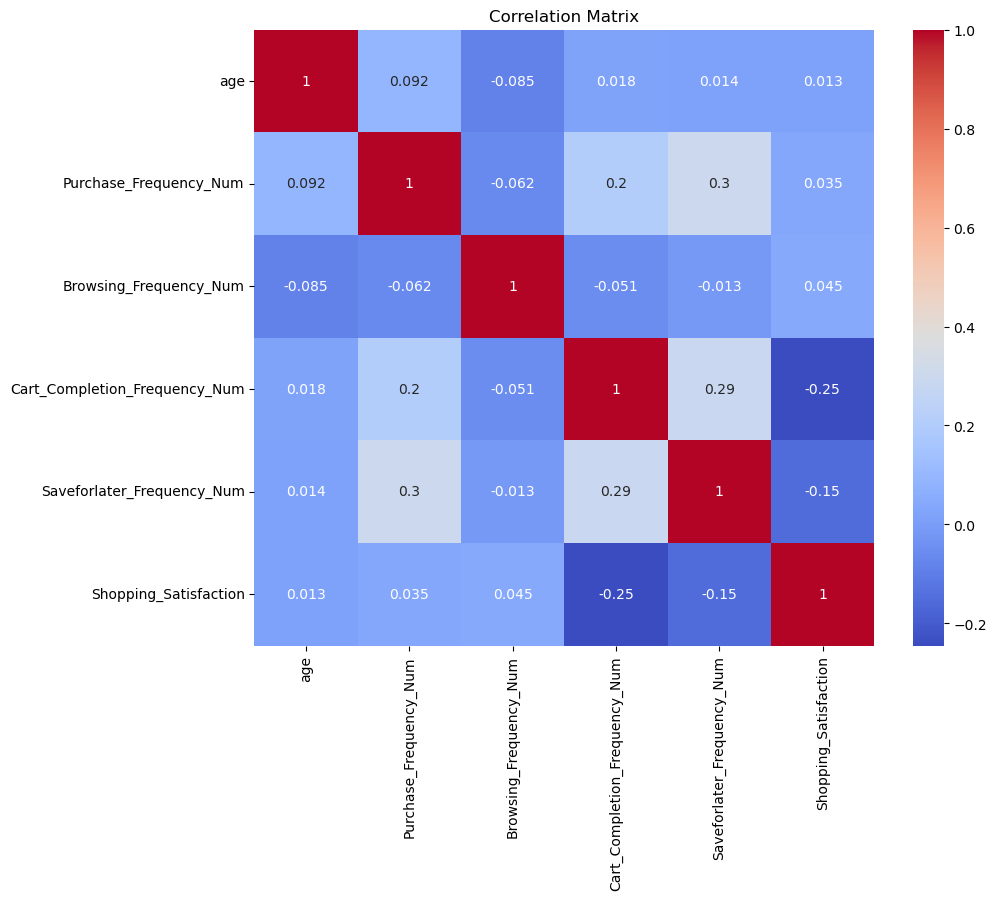

In [47]:
# Select relevant columns for correlation. For example:
selected_columns = ['age', 'Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Shopping_Satisfaction']  # add your selected columns

# Create the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Define a threshold for high browsing frequency
high_browsing_threshold = 0.5  # This is arbitrary and can be adjusted based on your data distribution
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]
low_browsing_freq = data[data['Browsing_Frequency_Num'] <= high_browsing_threshold]

# Analyzing Purchase_Frequency based on Recommendation_Helpfulness within high browsing frequency segment
high_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] > high_browsing_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] <= high_browsing_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): {mean_purchase_high_recommend}")
print(f"Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): {mean_purchase_low_recommend}")


Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): 0.5327380952380952
Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): 0.528969957081545


In [64]:
# Still need to add the right Personalized Recommendation Frequency
# Segmenting based on Browsing Frequency
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]

# Further segmenting based on Personalized Recommendation Frequency
# (Assuming high recommendation frequency is represented by a higher numerical value)
high_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] > high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]
low_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] <= high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]

# Analyzing Purchase Frequency
high_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] > high_rec_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] <= high_rec_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend_high_rec = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend_high_rec = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): {mean_purchase_high_recommend_high_rec}")
print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): {mean_purchase_low_recommend_high_rec}")


Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): 0.5540540540540541
Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): 0.5590909090909091


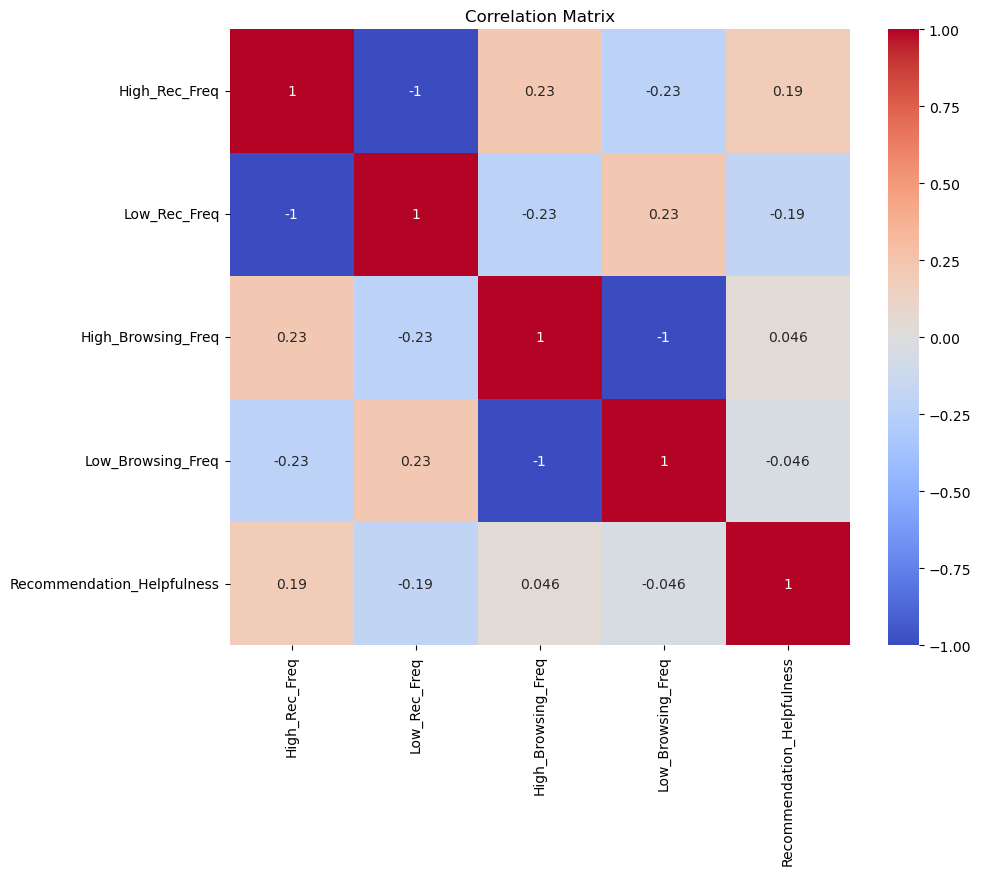

In [65]:
# Create a new DataFrame for the correlation analysis
correlation_data = pd.DataFrame()

# Assuming you have functions or logic to determine these segments
# Convert these segments into binary numerical values (1 for high, 0 for low)
correlation_data['High_Rec_Freq'] = data['Personalized_Recommendation_Frequency_Num'].apply(lambda x: 1 if x > data['Personalized_Recommendation_Frequency_Num'].median() else 0)
correlation_data['Low_Rec_Freq'] = 1 - correlation_data['High_Rec_Freq']
correlation_data['High_Browsing_Freq'] = data['Browsing_Frequency_Num'].apply(lambda x: 1 if x > high_browsing_threshold else 0)
correlation_data['Low_Browsing_Freq'] = 1 - correlation_data['High_Browsing_Freq']
correlation_data['Recommendation_Helpfulness'] = data['Recommendation_Helpfulness_Num']  # Assuming it's already numerical

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


c:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


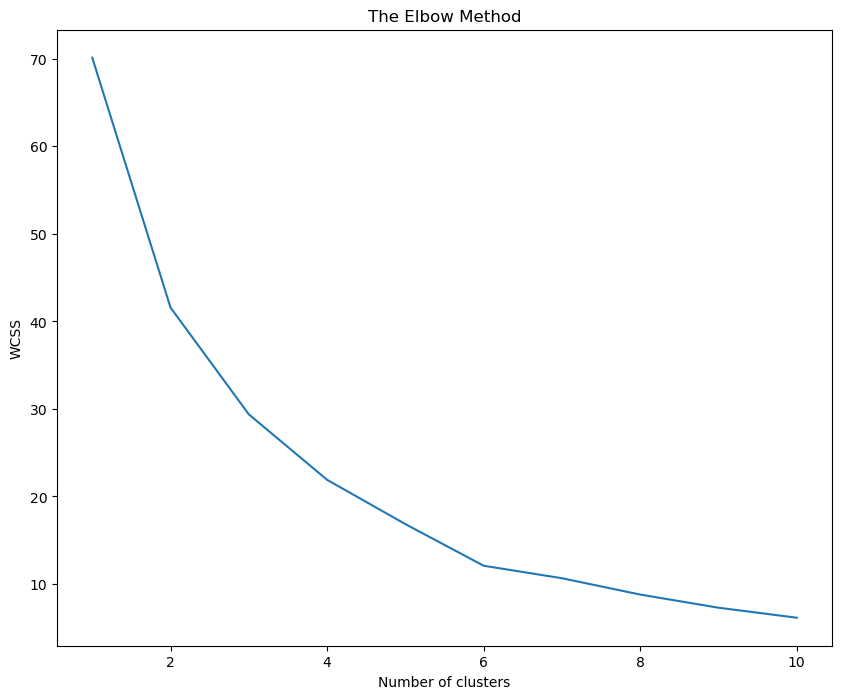

In [24]:
features = data[['Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num']]

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Adding the cluster labels to your original DataFrame
data['Cluster_Labels'] = cluster_labels

# Check the value counts for each cluster
print(data['Cluster_Labels'].value_counts())

# Optionally, you can also examine the cluster centers
print(kmeans.cluster_centers_)

1    324
2    136
0    129
Name: Cluster_Labels, dtype: int64
[[0.79263566 0.82170543]
 [0.49845679 0.56867284]
 [0.47610294 0.14522059]]


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'data' is your DataFrame and 'Purchase_Frequency' and 'Purchase_Categories' are categorical

# Encode categorical data
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_purchase_cat = LabelEncoder()
data['Purchase_Categories'] = le_purchase_cat.fit_transform(data['Purchase_Categories'])

# Normalize age
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])

# Feature selection for K-Means
features = data[['age', 'Gender', 'Purchase_Frequency_Num', 'Purchase_Categories']]

# Determine the number of clusters (k) using the Elbow method or Silhouette analysis (not shown here)
# For demonstration purposes, let's assume k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Assign the cluster labels to the original data
data['Cluster_Labels'] = kmeans.labels_

# Now you can analyze the clusters
print(data.groupby('Cluster_Labels').mean())


                     age    Gender  Purchase_Categories  \
Cluster_Labels                                            
0              -0.111692  0.669528             1.309013   
1               0.260981  0.807339            25.944954   
2              -0.009809  0.757085            10.465587   

                Customer_Reviews_Importance  \
Cluster_Labels                                
0                                  2.467811   
1                                  2.458716   
2                                  2.502024   

                Personalized_Recommendation_Frequency   Rating_Accuracy   \
Cluster_Labels                                                             
0                                             2.725322          2.699571   
1                                             2.623853          2.706422   
2                                             2.700405          2.615385   

                Shopping_Satisfaction  Purchase_Frequency_Num  \
Cluster_Labels        

c:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


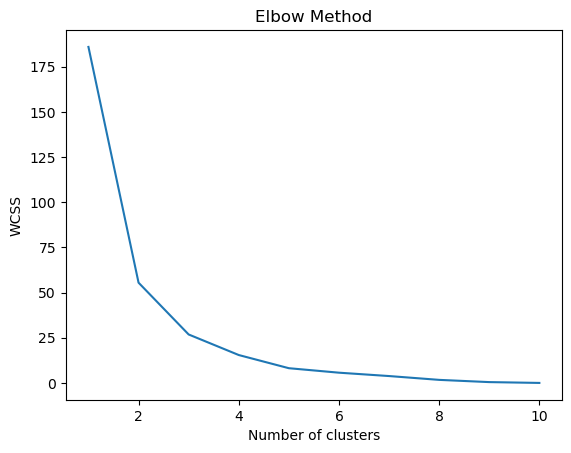

Silhouette Score: 0.69


In [53]:
# Selecting features for clustering
X = data[['Purchase_Frequency_Num', 'Browsing_Frequency_Num']]

# Elbow Method to find the optimal number of clusters
wcss = []  # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means Clustering with the chosen number of clusters
k = 4  # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Adding cluster ID to the DataFrame
data['Cluster_ID'] = y_kmeans

In [54]:
# Gender groups
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust bins as needed
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

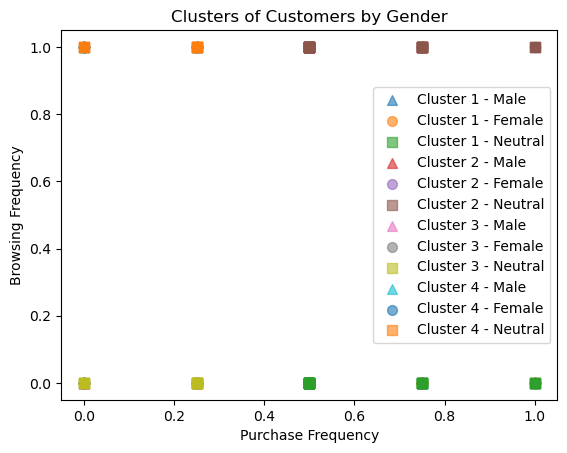

In [55]:
# Define the markers for each gender
gender_markers = {'Male': '^', 'Female': 'o', 'Neutral': 's'}

# Create a scatter plot for each cluster and gender
for cluster_id in range(k):
    clustered_data = data[data['Cluster_ID'] == cluster_id]
    for gender, marker in gender_markers.items():
        gender_data = clustered_data[clustered_data['Gender'] == gender]
        plt.scatter(
            gender_data['Purchase_Frequency_Num'],
            gender_data['Browsing_Frequency_Num'],
            s=50,
            marker=marker,
            alpha=0.6,
            label=f'Cluster {cluster_id + 1} - {gender}' if gender_data.shape[0] > 0 else ""
        )

# Title and labels
plt.title('Clusters of Customers by Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Browsing Frequency')

# This ensures that each label is only added to the legend once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()



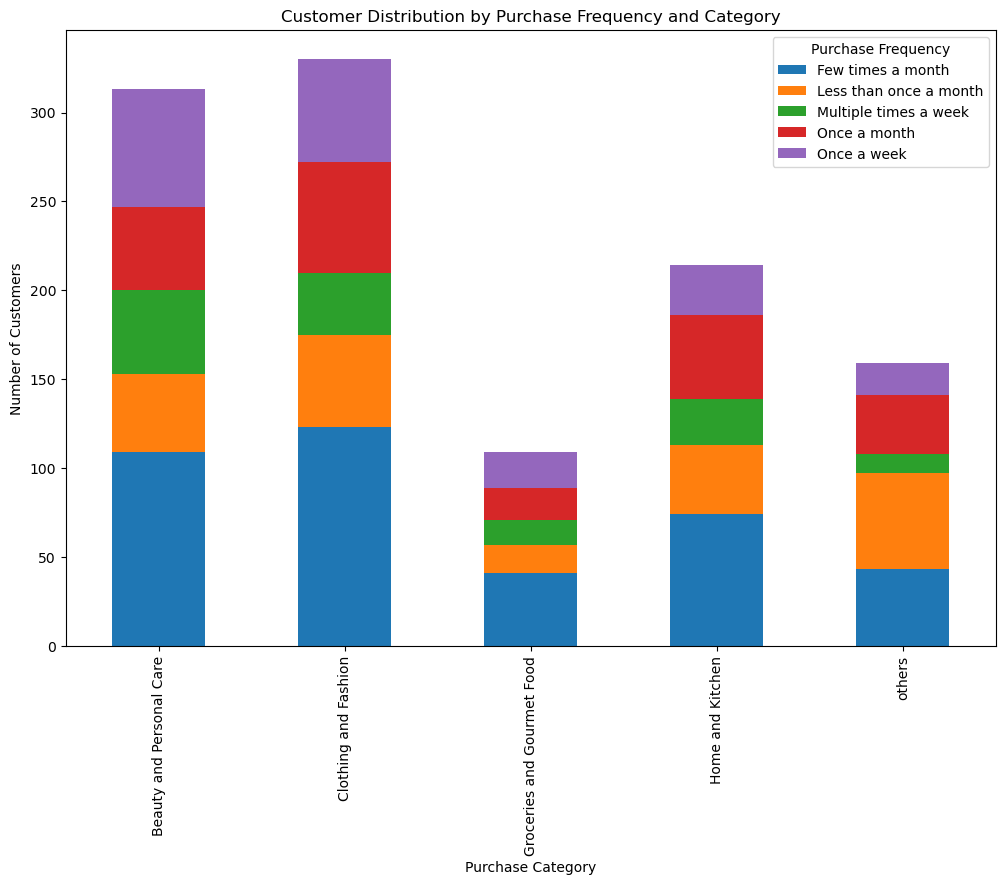

In [56]:
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Group by 'Split_Category' and 'Purchase_Frequency' and count the number of customers
category_freq_count = data_split.groupby(['Split_Category', 'Purchase_Frequency']).size().unstack(fill_value=0)

# Step 3: Visualize the Data
category_freq_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Purchase Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Purchase Frequency and Category')
plt.legend(title='Purchase Frequency')
plt.show()

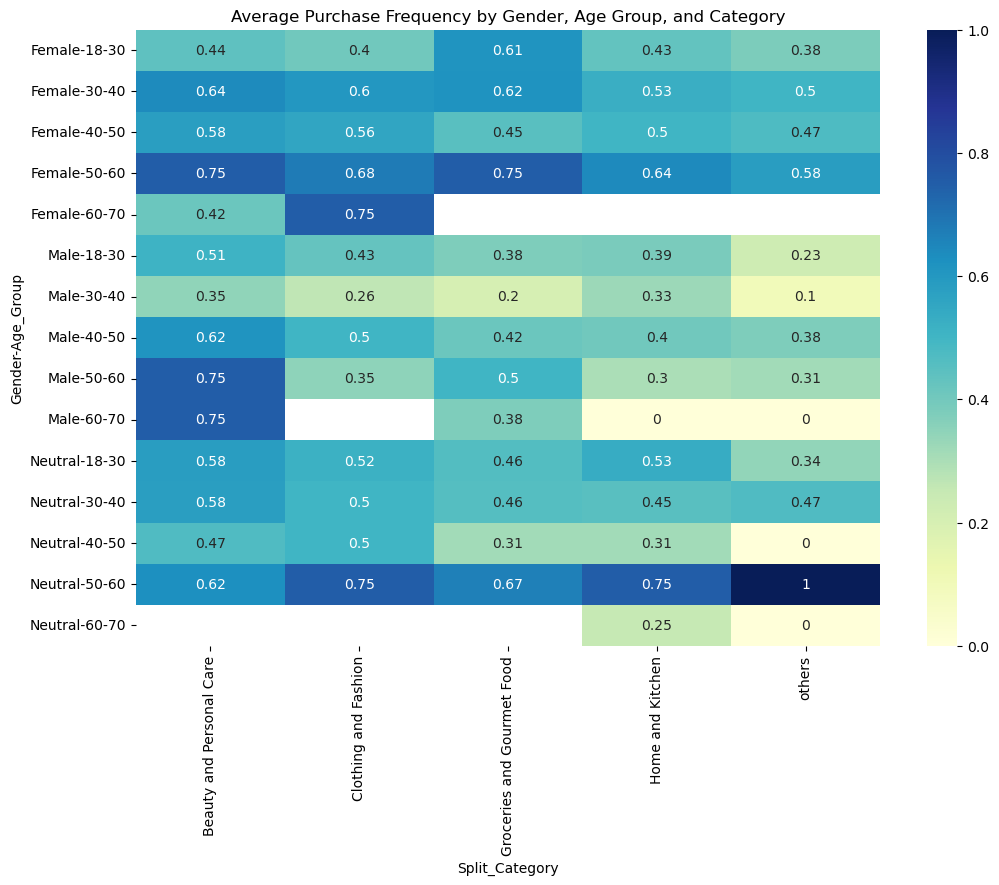

In [57]:
# Ensure data_split is updated with the new 'Age_Group'
data_split = data.join(split_categories)  # Assuming split_categories is already defined

# Group by Gender, Age_Group, and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Age_Group', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index=['Gender', 'Age_Group'], columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender, Age Group, and Category')
plt.show()

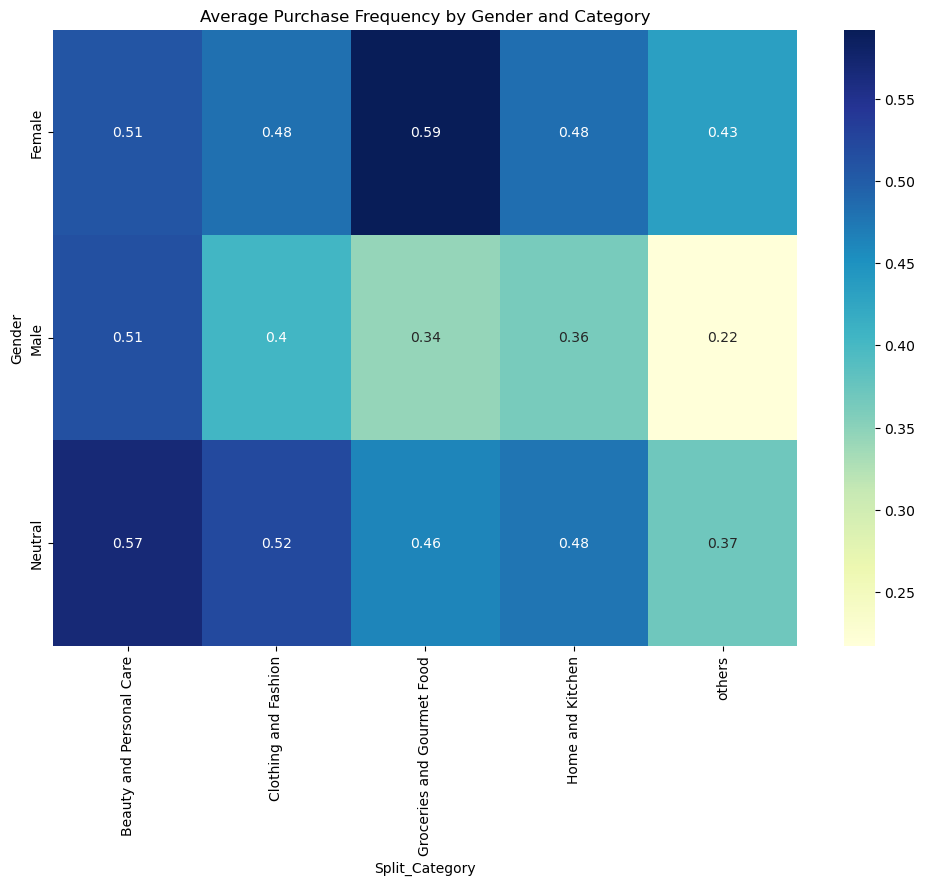

In [58]:
# Assuming 'data' is your DataFrame and 'data_split' has been prepared with 'Split_Category'

# Replace 'others' and 'Prefer not to say' in the Gender column
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Group by Gender and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index='Gender', columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender and Category')
plt.show()

Silhouette Score: 0.37


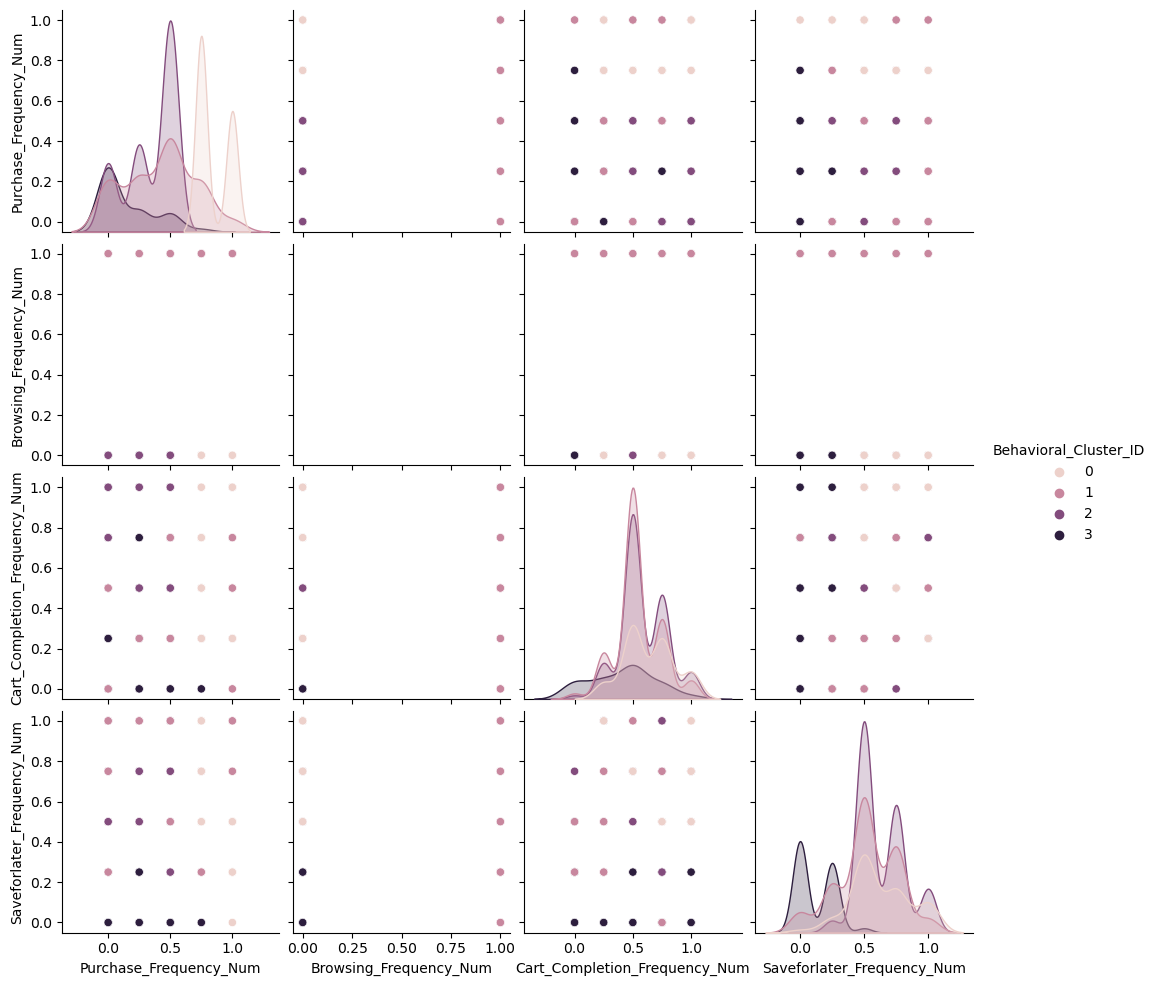

In [71]:
# Assuming data is your DataFrame and the columns have been appropriately preprocessed
X = data[['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num']]

# Elbow Method for optimal number of clusters
# ...

# Applying K-Means Clustering
k = 4  # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add cluster ID to the DataFrame
data['Behavioral_Cluster_ID'] = y_kmeans

# Pair Plot for visualization
sns.pairplot(data, vars=['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num'], hue='Behavioral_Cluster_ID')
plt.show()